In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely

In [2]:
shp_ndf_df = pd.read_csv('../data/country_ndf_correspondence.csv')
places = pd.read_csv('../data/place_df.csv')

In [3]:
ndf = pd.read_csv(f'../data/gridcell_studies_6 - Precipitation - upper_pred_2.5.csv')

ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"n_study_prop"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.Country).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

vm = np.nanmax(n)

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

n[~np.isnan(n)]

array([1.08264003, 0.90127553, 0.90127553, 0.90127553, 0.90127553,
       0.83264003, 0.90127553, 0.90127553, 1.15127553, 3.60127553,
       0.90127553, 0.9040686 , 0.90127553, 1.15127553, 1.15127553,
       3.15127553, 1.23460887, 1.40127553, 0.90127553, 0.90127553,
       1.10127553, 0.90127553, 0.90127553, 0.90127553, 1.13460887,
       0.90127553, 0.90127553])

In [4]:
vm=10

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


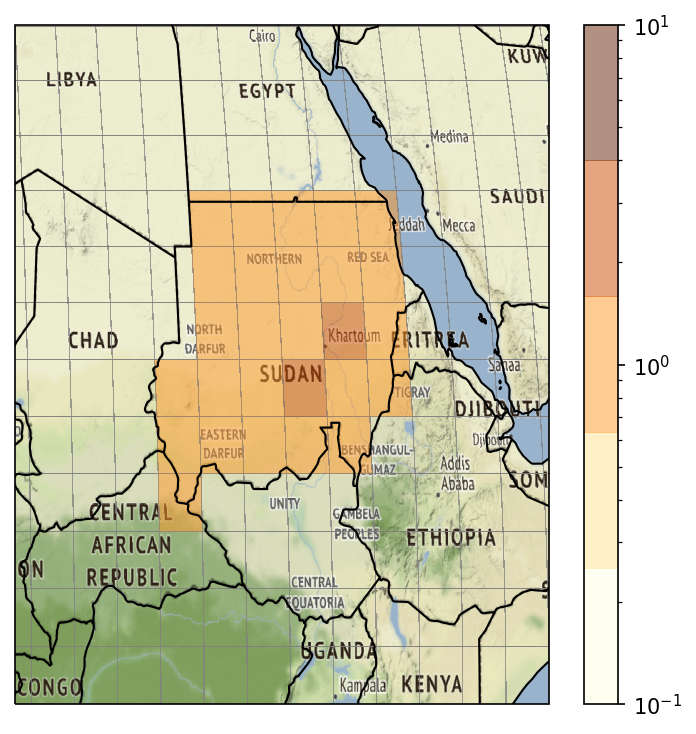

In [6]:
import cartopy.io.img_tiles as cimgt

stamen_terrain = cimgt.Stamen('terrain')

plt.figure(dpi=150, figsize=(6,6))
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)
#ax.set_extent([0,30,50,80])

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

degrees=2.5

mesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    n,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
    cmap=plt.cm.get_cmap('YlOrBr',5), 
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)

plt.savefig("../plots/maps/sudan_precipitation_studies.png", bbox_inches="tight")

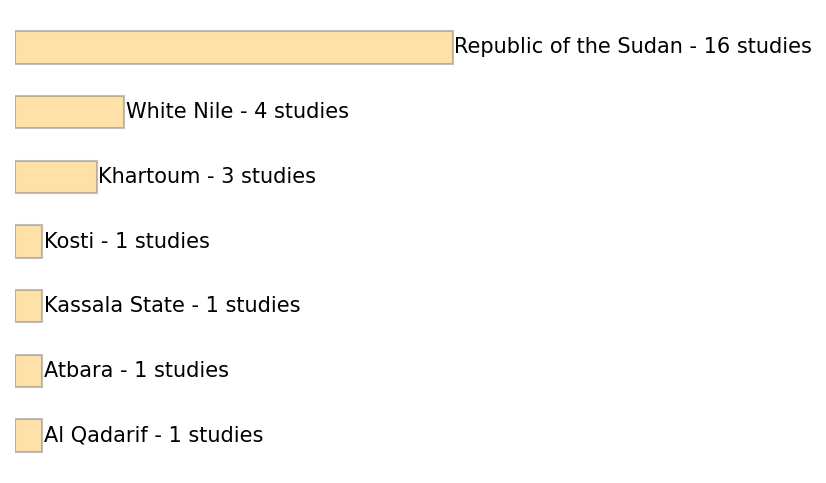

In [7]:
fig, ax = plt.subplots(dpi=150, figsize=(4,4))

df_ndf = pd.read_csv('../data/study_gridcell_6 - Precipitation - upper_pred_2.5.csv')
doc_ids = df_ndf.loc[df_ndf["ndf_id"].isin(ndf_ids),"doc_id"]

splaces = places[(places["doc_id"].isin(doc_ids)) & (places["country_predicted"]=="SDN")].groupby('place_name').size().sort_values()

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey")

for i, c in enumerate(splaces):
    ax.text(c+0.05, i, f"{splaces.index[i]} - {c} studies", va="center")
    
ax.set_xlim(0,c+1)
plt.axis('off')

plt.savefig("../plots/maps/sudan_precipitation_study_places.png", bbox_inches="tight")

In [8]:
ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"da_cat"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.da_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

n.sum()

nan

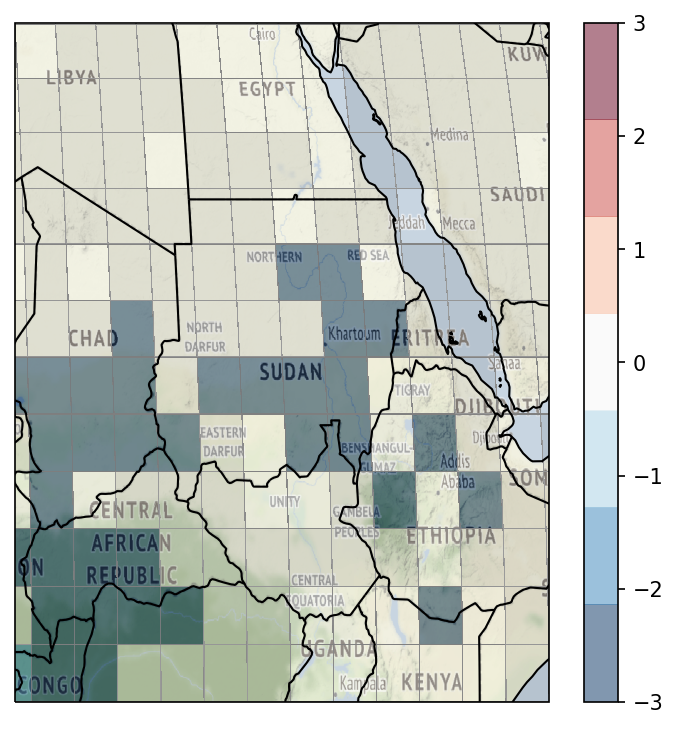

In [9]:
import cartopy.io.img_tiles as cimgt

degrees=2.5

stamen_terrain = cimgt.Stamen('terrain')

plt.figure(dpi=150, figsize=(6,6))
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

mesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

mmesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    cn,
    cmap = mpl.colors.ListedColormap(["lightgrey"]),
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)

In [10]:
cdf = ndf.loc[ndf_ids]

cdf.groupby('da_cat', dropna=False).size()

da_cat
-3.0    11
 0.0     4
 NaN    12
dtype: int64

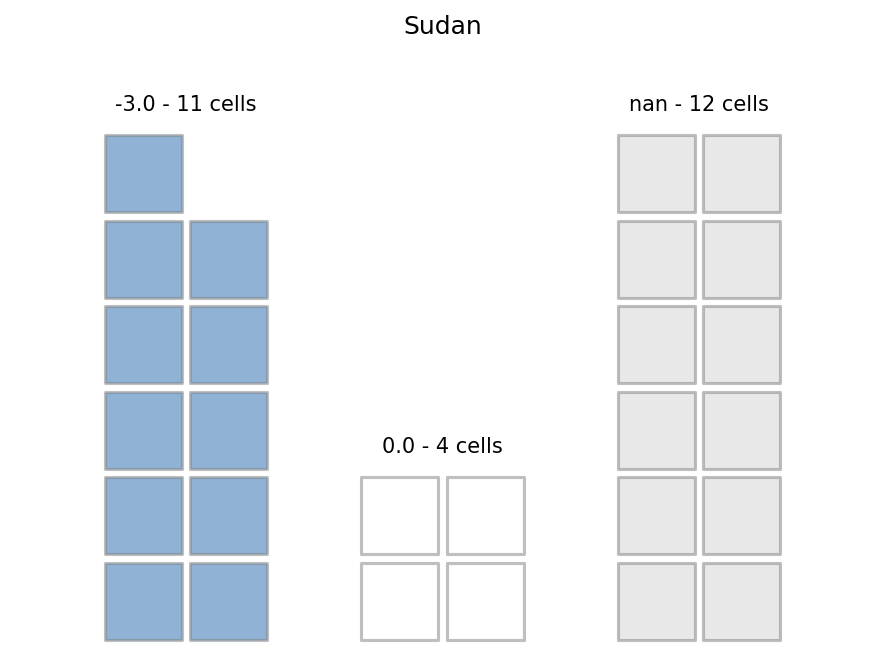

In [11]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


cols = 2

colors = ["#2166ac", "white","lightgrey"]

fig, ax = plt.subplots(dpi=150, figsize=(6,6))

i = 0

for name, group in cdf.groupby('da_cat', dropna=False):
    rects = []
    for j in range(group.shape[0]):
        x = i*3+1+j%2
        y = j//2
        rect = Rectangle((x+0.05,y+0.05), 0.9,0.9)
        rects.append(rect)
        
    pc = PatchCollection(rects, facecolor=colors[i], alpha=0.5,
                         edgecolor="grey", lw=1.5)

    # Add collection to axes
    ax.add_collection(pc)
    
    ax.text(i*3+2,y+1.2,f"{name} - {j+1} cells", ha="center",va="bottom")
    
    i+=1
    
plt.axis('scaled')
plt.axis('off')

    
#ax.set_ylim(0, i*3+1)
ax.set_ylim(0,7)
ax.set_xlim(0, i*3+1)

ax.set_title("Sudan")

fig.tight_layout()

plt.savefig("../plots/maps/sudan_gridcell_count.png", bbox_inches="tight")

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:144: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


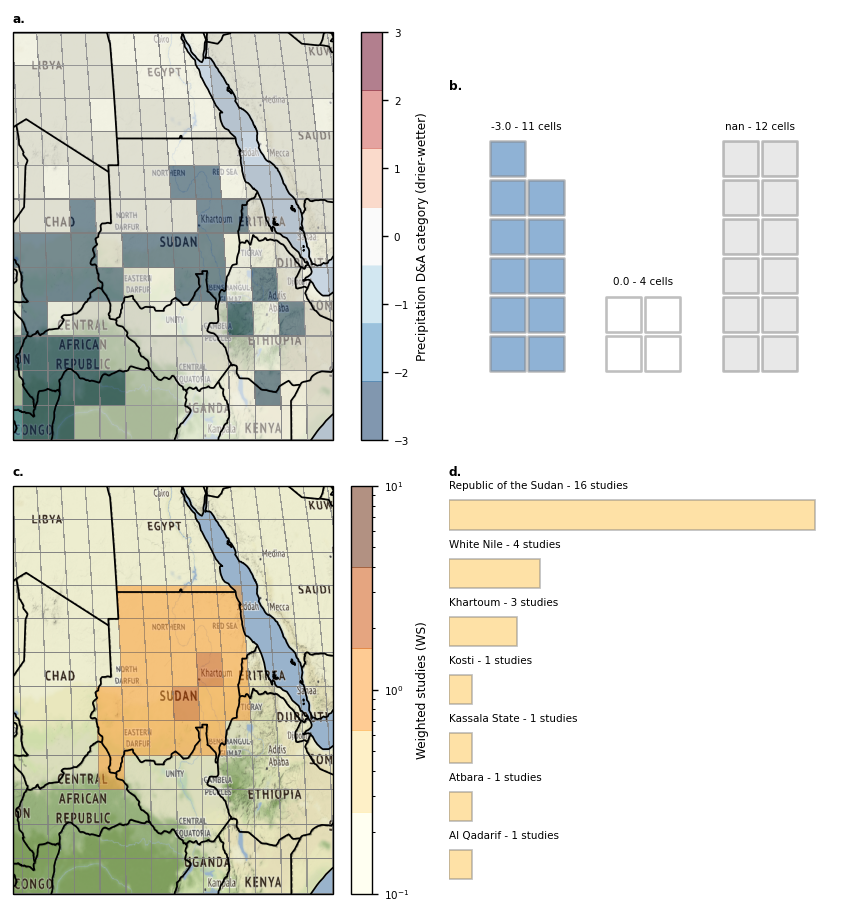

In [16]:
fig = plt.figure(dpi=125, figsize=(7.2,7.2), constrained_layout=True)
gs = fig.add_gridspec(2, 2, figure=fig)

ax = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
ax.set_title("a.", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"da_cat"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.da_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

mesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

mmesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    cn,
    cmap = mpl.colors.ListedColormap(["lightgrey"]),
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)
cbar.set_label('Precipitation D&A category (drier-wetter)', fontsize=7)
cbar.ax.tick_params(labelsize=6)


ax = plt.subplot(gs[0,1])
i = 0

for name, group in cdf.groupby('da_cat', dropna=False):
    rects = []
    for j in range(group.shape[0]):
        x = i*3+1+j%2
        y = j//2
        rect = Rectangle((x+0.05,y+0.05), 0.9,0.9)
        rects.append(rect)
        
    pc = PatchCollection(rects, facecolor=colors[i], alpha=0.5,
                         edgecolor="grey", lw=1.5)

    # Add collection to axes
    ax.add_collection(pc)
    
    ax.text(i*3+2,y+1.2,f"{name} - {j+1} cells", ha="center",va="bottom", fontsize=6)
    
    i+=1
    
plt.axis('scaled')
plt.axis('off')

    
#ax.set_ylim(0, i*3+1)
ax.set_ylim(0,7)
ax.set_xlim(0, i*3+1)

ax.set_title("b.", loc="left", fontweight="bold", fontsize=7)


###############################################################
####################

ndf = pd.read_csv(f'../data/gridcell_studies_6 - Precipitation - upper_pred_2.5.csv')

ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"n_study_prop"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.Country).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

vm = np.nanmax(n)

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

ax = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
ax.set_title("c.", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)
#ax.set_extent([0,30,50,80])

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

mesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    n,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    norm = mpl.colors.LogNorm(vmin=0.1, vmax=10),
    cmap=plt.cm.get_cmap('YlOrBr',5), 
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)
cbar.set_label('Weighted studies (WS)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

###########################

ax = plt.subplot(gs[1,1])
ax.set_title("d.", loc="left", fontweight="bold", fontsize=7)

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey", ax=ax)

for i, c in enumerate(splaces):
    ax.text(0, i+0.5, f"{splaces.index[i]} - {c} studies", va="center", fontsize=6)
    
ax.set_xlim(0,c+1)
ax.axis('off')

plt.savefig('../figures/si_figure_5.pdf')
plt.savefig('../figures/si_figure_5.png', dpi=150)

array([1.08264003, 0.90127553, 0.90127553, 0.90127553, 0.90127553,
       0.83264003, 0.90127553, 0.90127553, 1.15127553, 3.60127553,
       0.90127553, 0.9040686 , 0.90127553, 1.15127553, 1.15127553,
       3.15127553, 1.23460887, 1.40127553, 0.90127553, 0.90127553,
       1.10127553, 0.90127553, 0.90127553, 0.90127553, 1.13460887,
       0.90127553, 0.90127553])